<a href="https://colab.research.google.com/github/szhang06/energy_price_prediction/blob/main/Energy_Price_Prediction_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build an Electricity Price Forecasting System with Xgboost**

##### Note: The training and deployment of the model on amazon sagemaker is demonstrated in the other notebook.



### **Import Libaries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib

### **Data Loading**

In [ ]:
# !unzip /content/drive/MyDrive/energy_dataset.csv.zip

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)

energy = pd.read_csv("/content/drive/MyDrive/energy_dataset.csv", index_col = "time", parse_dates = ["time"]) # set time as index for consistency.


### **Initial Data Exploration**
  - data type
  - data distribution (statistical meansures and visualization)


In [ ]:
print(energy.shape)
energy.head()

(35064, 28)


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
energy.describe(include = "all")

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped storage a

### **Data Preparation**
 - invalid values
 - missing values
 - remove duplicates
 - formatting
 -featue engineering

#### Drop columns with all nah or 0 and fill missing values

In [ ]:
# check nan and missing values

energy.isnull().values.sum(axis = 0)

array([   19,    18,    18,    18,    18,    19,    18,    18,    18,
       35064,    19,    19,    18,    19,    17,    18,    18,    18,
          19,    18,    18,     0, 35064,     0,     0,    36,     0,
           0])

In [ ]:
# drop all nah and 0 columns

energy.dropna(axis = "columns", how = "all", inplace = True)

In [ ]:
energy.nunique()

generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                                 262
generation wind offshore                      

In [ ]:
# drop columns with value = 0.0 only

energy.drop(columns=energy.columns[energy.nunique()==1], inplace=True)
# energy.nunique()
# energy.shape

In [ ]:
# count nah values in each column

energy.isnull().values.sum(axis = 0) 

array([19, 18, 18, 18, 19, 19, 19, 18, 17, 18, 18, 18, 19, 18,  0,  0,  0,
       36,  0,  0])

In [ ]:
# fillna with ffill

energy.fillna(method = "ffill", inplace = True)
energy.isnull().values.sum(axis = 0) 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# find duplicate rows

energy[energy.duplicated()]

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,


#### Convert time object type to datetimeint64

In [ ]:
energy.index = pd.to_datetime(energy.index, utc=True)
energy.index.dtype

datetime64[ns, UTC]

In [ ]:
energy.describe(include = "all")

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.532797,448.091918,5622.705653,4256.550622,298.341319,475.563997,972.206337,2605.496121,6263.501854,60.225416,85.634326,1432.804957,269.419205,5465.115589,1439.066735,5471.216689,28712.129962,28697.608573,49.874341,57.884023
std,85.346455,354.616732,2201.557635,1961.973297,52.518371,792.291849,400.714694,1835.074561,840.244555,20.238846,14.076953,1680.007595,50.217172,3213.736451,1677.703355,3176.312853,4594.100854,4575.872425,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,69.000000,2979.000000,24793.750000,24806.750000,41.490000,49.347500
50%,367.000000,509.000000,4969.500000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,576.000000,4855.000000,28906.000000,28902.000000,50.520000,58.020000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3757.250000,7025.000000,80.000000,97.000000,2579.000000,310.000000,7399.500000,2636.000000,7353.000000,32263.250000,32194.250000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,5836.000000,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [ ]:
# check frequency of zeros in each column
for i in energy.columns:
  print(i, (energy[i] == 0.000000).sum())


generation biomass 4
generation fossil brown coal/lignite 10524
generation fossil gas 1
generation fossil hard coal 3
generation fossil oil 3
generation hydro pumped storage consumption 12615
generation hydro run-of-river and poundage 3
generation hydro water reservoir 3
generation nuclear 3
generation other 4
generation other renewable 3
generation solar 3
generation waste 3
generation wind onshore 3
forecast solar day ahead 539
forecast wind onshore day ahead 0
total load forecast 0
total load actual 0
price day ahead 0
price actual 0


#### Feature engineering

In [ ]:
# create hour, day, month, year feature  dayofweek, quarter, dayofyear

energy["hour"] = energy.index.hour
energy["day"] = energy.index.day
energy["month"] = energy.index.month
energy["year"] = energy.index.year

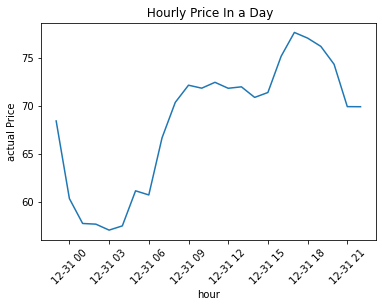

In [ ]:
# check out the one day price trend

x = energy.iloc[-24:].index
y = energy["price actual"].iloc[-24:]

# plt.figure(figsize=(10,6)) # change figure size

plt.plot(x, y)
plt.xticks(rotation = 45)
plt.xlabel("hour")
plt.ylabel("actual Price")
plt.title(" Hourly Price In a Day")



plt.show()

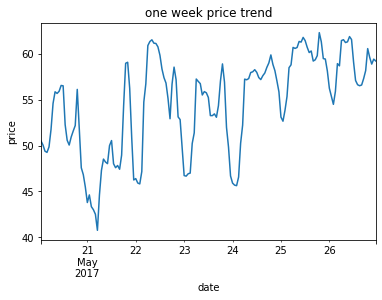

In [ ]:
# one week price trend
energy.iloc[(energy.index > "2017-05-20") & (energy.index < "2017-05-27")]["price actual"].plot() # Saturday to Friday
plt.xlabel("date")
plt.ylabel("price")
plt.title("one week price trend")
plt.show()

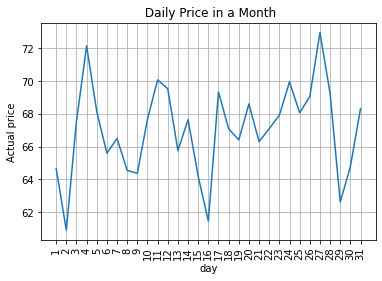

In [ ]:
# check out one month price trend

y = energy.iloc[-24*31:]
y_day = y.groupby("day")["price actual"].mean()
y = y_day.reset_index(name = "day mean") # return
# y_day.to_frame({"price actual": "day mean"})
y.head()
# plt.figure(figsize=(10,10)) # change figure size

plt.plot(y["day"], y["day mean"])
plt.xticks(list(range(1,max(y["day"])+1)),[str(i) for i in range(1,max(y["day"])+1)], rotation = "90")
plt.xlabel("day")
plt.ylabel("Actual price")
plt.title(" Daily Price in a Month")
plt.grid()



plt.show()

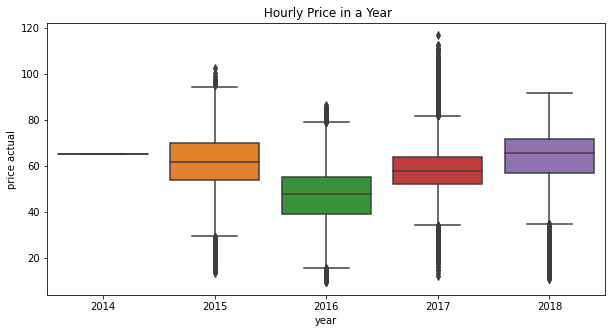

In [ ]:
# check out yearly price distribution

fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = energy, x = "year", y = "price actual")
ax.set_title(" Hourly Price in a Year")

plt.show()


#### Check feature correlation

In [ ]:
print(energy.shape)

(35064, 24)


In [ ]:
corr = energy.corr()
corr.style.background_gradient(cmap='YlOrBr')

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,hour,day,month,year
generation biomass,1.000000,0.230034,-0.021522,0.433733,0.459588,-0.045055,-0.284648,-0.033352,-0.021065,0.658392,-0.560600,-0.004746,-0.346073,-0.068688,-0.008757,-0.072391,0.085633,0.083438,0.109236,0.142688,0.022082,0.040743,-0.003878,-0.639176
generation fossil brown coal/lignite,0.230034,1.000000,0.499899,0.768819,0.314885,-0.324024,-0.524707,-0.228906,-0.007578,0.097981,0.104386,0.040033,0.282888,-0.434212,0.041850,-0.436119,0.279087,0.280729,0.568156,0.363986,0.051783,0.062787,0.201740,-0.101341
generation fossil gas,-0.021522,0.499899,1.000000,0.541687,0.309545,-0.420747,-0.271495,0.060344,-0.112268,-0.065987,0.334827,0.074464,0.275167,-0.397335,0.079865,-0.397337,0.543760,0.548990,0.640891,0.461423,0.177327,0.064127,0.195255,0.183503
generation fossil hard coal,0.433733,0.768819,0.541687,1.000000,0.440851,-0.406298,-0.497573,-0.157093,-0.023168,0.264624,-0.019593,0.045870,0.170264,-0.441781,0.047012,-0.444420,0.394870,0.396947,0.671779,0.465648,0.099842,0.081974,0.182159,-0.243959
generation fossil oil,0.459588,0.314885,0.309545,0.440851,1.000000,-0.330967,-0.106458,0.160700,0.015430,0.374773,-0.115386,0.100213,-0.176109,-0.051755,0.096491,-0.058223,0.498497,0.496173,0.292831,0.285021,0.148326,-0.008314,-0.003052,-0.288524
generation hydro pumped storage consumption,-0.045055,-0.324024,-0.420747,-0.406298,-0.330967,1.000000,0.053197,-0.234451,0.012494,0.021258,-0.267355,-0.214355,-0.188288,0.389139,-0.221756,0.390539,-0.559814,-0.562769,-0.600553,-0.426211,-0.354983,-0.041349,-0.077393,-0.083730
generation hydro run-of-river and poundage,-0.284648,-0.524707,-0.271495,-0.497573,-0.106458,0.053197,1.000000,0.652724,-0.124114,-0.127353,0.053214,0.039655,-0.286303,0.223203,0.045172,0.226447,0.120586,0.118340,-0.294518,-0.136657,0.067798,-0.129474,-0.323671,0.221286
generation hydro water reservoir,-0.033352,-0.228906,0.060344,-0.157093,0.160700,-0.234451,0.652724,1.000000,-0.049216,0.065300,-0.065920,0.091686,-0.288154,-0.019419,0.102927,-0.011726,0.476691,0.479253,-0.017423,0.071830,0.219505,-0.076531,-0.227549,-0.041160
generation nuclear,-0.021065,-0.007578,-0.112268,-0.023168,0.015430,0.012494,-0.124114,-0.049216,1.000000,0.041723,-0.062053,0.003860,0.087578,0.048472,-0.001003,0.044919,0.090866,0.085803,-0.043348,-0.052981,-0.002981,0.005914,-0.100151,-0.070324
generation other,0.658392,0.097981,-0.065987,0.264624,0.374773,0.021258,-0.127353,0.065300,0.041723,1.000000,-0.443450,-0.016822,-0.359655,0.047374,-0.019434,0.044602,0.101702,0.100768,0.043971,0.099875,0.006792,-0.010167,0.008350,-0.466431



#### Collinearity:
  - forecast solar day ahead vs. generation solar 
  - total load forecast vs. total load actual
  - forecast wind onshore day ahead vs. generation wind onshore

In [ ]:
energy.corr()["price actual"].sort_values(ascending = False)

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465648
generation fossil gas                          0.461423
total load forecast                            0.435864
total load actual                              0.435573
generation fossil brown coal/lignite           0.363986
generation fossil oil                          0.285021
month                                          0.281219
generation other renewable                     0.255544
hour                                           0.237381
generation waste                               0.168735
year                                           0.142870
generation biomass                             0.142688
forecast solar day ahead                       0.101402
generation other                               0.099875
generation solar                               0.098530
generation hydro water reservoir               0

#### Remove features 

In [ ]:
# further remove 3 collinearity features and irrelevant forecast features
energy.drop(["forecast solar day ahead", "total load forecast", "forecast wind onshore day ahead","forecast solar day ahead", "total load forecast" ], axis = 1, inplace = True)

In [ ]:
energy.shape

(35064, 21)

#### observations of dependent variable:
 - in the middle of each year, the actual price is the lowest except that it lasted for months in 2017. 

#### Check for stationality

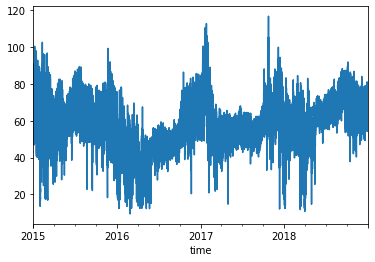

In [ ]:
# plot target variable

energy["price actual"].plot()
plt.show()

In [ ]:
# test stationality   https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53

# just to check if p-value < 0.05 -> stationary
# hypothesis: data is not stationary

from statsmodels.tsa.stattools import adfuller
def ad_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("ADF : ",dftest[0])
     print("P-Value : ", dftest[1])
     print("Num Of Lags : ", dftest[2])
     print("Num Of Observations Used For ADF Regression:", dftest[3])
     print("Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(energy['price actual'])

ADF :  -9.14701623285124
P-Value :  2.7504934849334166e-15
Num Of Lags :  50
Num Of Observations Used For ADF Regression: 35013
Critical Values :
	 1% :  -3.4305367814665044
	 5% :  -2.8616225527935106
	 10% :  -2.566813940257257


#### **Data splilt**

In [ ]:
# move target column to the beginning as required by xgb

price_actual = energy.pop("price actual")
energy = pd.concat([price_actual, energy], axis=1)
energy.head()

,price actual,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,hour,day,month,year
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,65.41,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,23,31,12,2014
2015-01-01 00:00:00+00:00,64.92,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,0,1,1,2015
2015-01-01 01:00:00+00:00,64.48,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,1,1,1,2015
2015-01-01 02:00:00+00:00,59.32,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,2,1,1,2015
2015-01-01 03:00:00+00:00,56.04,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,3,1,1,2015


In [ ]:
n = energy.shape[0]

In [ ]:
# split data to train, validate and test by 6:2:2
train = energy.iloc[:int(n*0.6)]
validate = energy.iloc[int(n*0.6):int(n*0.8)]
test = energy.iloc[int(n*0.8):]
train.shape


(21038, 21)

In [ ]:
train.head()

,price actual,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,hour,day,month,year
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,65.41,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,23,31,12,2014
2015-01-01 00:00:00+00:00,64.92,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,0,1,1,2015
2015-01-01 01:00:00+00:00,64.48,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,1,1,1,2015
2015-01-01 02:00:00+00:00,59.32,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,2,1,1,2015
2015-01-01 03:00:00+00:00,56.04,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,3,1,1,2015


In [ ]:
train.columns

Index(['price actual', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
train.to_csv("train.csv", index = False, header=False) # remove index as required by sagemaker
validate.to_csv("dev.csv", index = False, header=False) 
test.to_csv("test.csv", index = False, header=False)

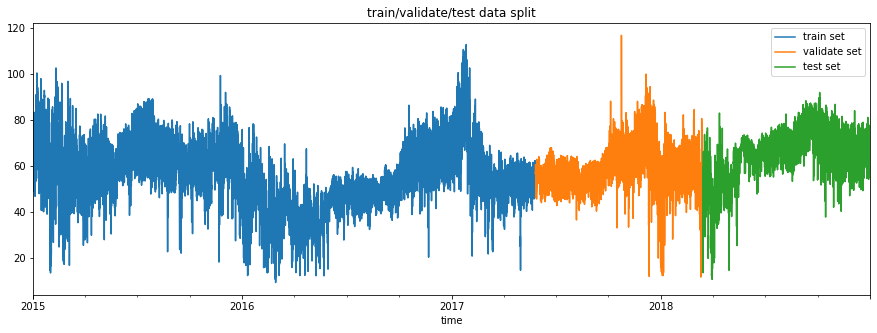

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
train["price actual"].plot(ax = ax, label = "train dataset", title = "train/validate/test data split")
validate["price actual"].plot(ax = ax, label = "validate dataset")
test["price actual"].plot(ax = ax, label = "test dataset")
# plt.axvline(x = energy.iloc[21038].name,color = "black", ls = "--" )
# plt.axvline(x = energy.iloc[28051].name,color = "black", ls = "--" )

ax.legend(["train set", "validate set", "test set"])

plt.show()

In [ ]:
# X, Y split
columns = energy.columns.values
features = columns[1:]
target = columns[0]
print("features:", features)
print("target: ", target)

features: ['generation biomass' 'generation fossil brown coal/lignite'
 'generation fossil gas' 'generation fossil hard coal'
 'generation fossil oil' 'generation hydro pumped storage consumption'
 'generation hydro run-of-river and poundage'
 'generation hydro water reservoir' 'generation nuclear'
 'generation other' 'generation other renewable' 'generation solar'
 'generation waste' 'generation wind onshore' 'total load actual'
 'price day ahead' 'hour' 'day' 'month' 'year']
target:  price actual


In [ ]:
X_train = train[features]
Y_train = train[target]
X_validate = validate[features]
Y_validate = validate[target]

X_test = test[features]
Y_test = test[target]

#### **Build a model**

In [ ]:
# model without tuning

reg = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.3)
reg.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)], early_stopping_rounds = 50, verbose = 100)

"""
n_estimators = the number of trees to build,

eval_set: evaluation dataset, 
early_stopping_rounds: the number of epoches over which no improvement for the eva_set is observed.

verbose = 100, print when every 100 trees are built,
"""

[21:59:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.3429	validation_1-rmse:46.4528
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[100]	validation_0-rmse:4.46188	validation_1-rmse:6.4534
[200]	validation_0-rmse:3.84622	validation_1-rmse:6.47526
Stopping. Best iteration:
[151]	validation_0-rmse:4.10386	validation_1-rmse:6.37365



'\nn_estimators = the number of trees to build,\n\neval_set: evaluation dataset, \nearly_stopping_rounds: the number of epoches over which no improvement for the eva_set is observed.\n\nverbose = 100, print when every 100 trees are built,\n'

#### Feature importance

 - cannot tell how correlated each feature is. 

In [ ]:
reg.feature_importances_

array([0.00880264, 0.00823605, 0.00886987, 0.01182222, 0.01399049,
       0.00482747, 0.00969134, 0.03042086, 0.0079114 , 0.01144166,
       0.00472495, 0.00418145, 0.01536553, 0.00776477, 0.03122867,
       0.43813255, 0.04776926, 0.06558146, 0.06150042, 0.20773691],
      dtype=float32)

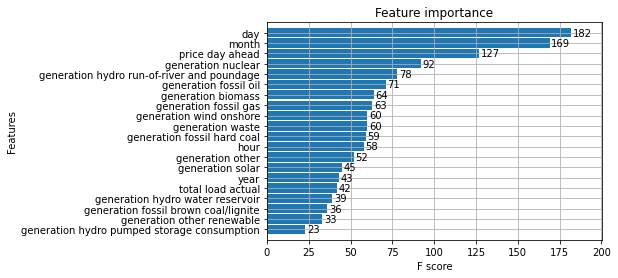

In [ ]:
from xgboost import plot_importance, plot_tree

_ = plot_importance(reg, height=0.9)

#### **Prediction**

In [ ]:
print(X_test.shape)

(7013, 20)


In [ ]:
test["prediction"] = reg.predict(X_test)

<ipython-input-40-d2cc01c4b3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"] = reg.predict(X_test)


In [ ]:
print(test["prediction"].values)

[54.34776  60.407955 53.359715 ... 75.61549  79.38935  78.49468 ]


In [ ]:
# combine prediction with actual price for plotting

energy_comb = energy.merge(test[["prediction"]], how = "left", left_index = True, right_index = True)  # return a new df
# energy_comb.head()

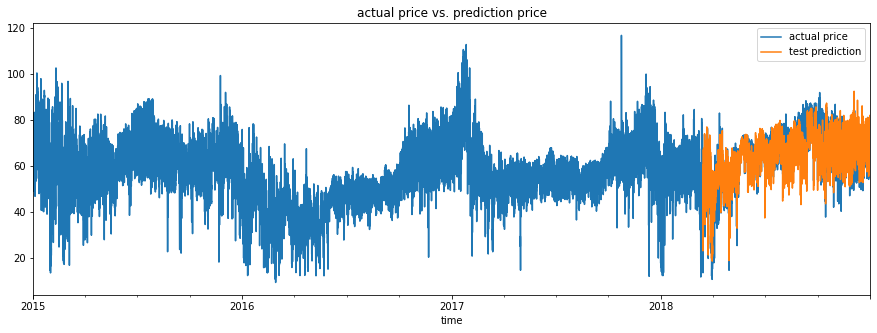

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
energy["price actual"].plot(ax = ax, label = "energy dataset", title = "actual price vs. prediction price")

energy_comb["prediction"].plot(ax = ax, label = "test prediction")

ax.legend(["actual price", "test prediction"])

plt.show()

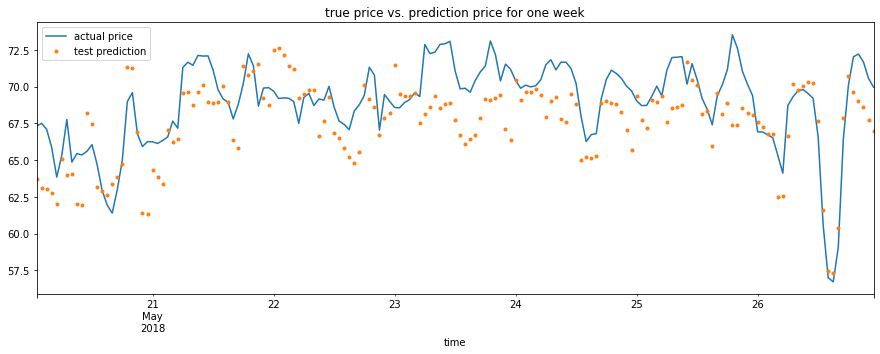

In [ ]:
# one week price prediction


ax = energy_comb.iloc[(energy.index > "2018-05-20") & (energy.index < "2018-05-27")]["price actual"].plot(figsize = (15,5), label = "actual price", title = "true price vs. prediction price for one week")

energy_comb.iloc[(energy.index > "2018-05-20") & (energy.index < "2018-05-27")]["prediction"].plot(ax = ax, style = ".", label = "preidction price")

ax.legend(["actual price", "test prediction"])

plt.show()

#### **Evaluation**

In [ ]:
np.sqrt(mean_squared_error(test["price actual"], test["prediction"]))

6.373651948599095

#### Prameter tuning
    key parameters: 
    n_estimators, learning_rate, early_stopping_rounds

In [ ]:
# parameter tuning

# could put fixed parameter to reg

parameters = {
        'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.3],
        'max_depth': [5, 6, 8],
        'min_child_weight': [1,2,3],
        'subsample': [0.7,1],
        'colsample_bytree': [0.7,1],
        'n_estimators' : [1000],
        'objective': ['reg:squarederror']
    }


reg = xgb.XGBRegressor()


reg_gsearch = GridSearchCV(estimator = reg,
                           param_grid = parameters,                        
                           scoring = 'neg_mean_squared_error', 
                           cv = 2, # speed up
                           n_jobs = -1, 
                           
                           )

# reg_gsearch is a model

reg_gsearch.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)], early_stopping_rounds=60, verbose = 100)
  # early_stopping_rounds = 0.15*estimator, placed in fit other than parameters dictionary where it has no effect.



[0]	validation_0-rmse:53.4244	validation_1-rmse:61.7984
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 60 rounds.
[100]	validation_0-rmse:4.43948	validation_1-rmse:7.30811
[200]	validation_0-rmse:3.65614	validation_1-rmse:6.98274
[300]	validation_0-rmse:3.18501	validation_1-rmse:6.91961
[400]	validation_0-rmse:2.88092	validation_1-rmse:6.89382
Stopping. Best iteration:
[342]	validation_0-rmse:3.04997	validation_1-rmse:6.8625



GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.3],
                         'max_depth': [5, 6, 8], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [1000],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.7, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", reg_gsearch.best_params_)

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.06, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [ ]:
np.sqrt(mean_squared_error(test["price actual"], reg_gsearch.predict(X_test)))  # > 6.37

6.8625052959867245

### **Save Model for Deployment**

In [ ]:
import pickle

In [ ]:
pickle.dump(reg_gsearch, open("xgbmodel.pickle", "wb")) # save 

In [ ]:
pickled_model = pickle.load(open("xgbmodel.pickle", "rb")) # load

In [ ]:
pickled_model.predict(X_test[0:2]) # predict

array([49.914276, 58.001804], dtype=float32)

In [ ]:
# save model to joblib
model_file_name = "xgbmodel"
import joblib

joblib.dump(reg_gsearch, model_file_name) 

['xgbmodel']

In [ ]:
bt1 = joblib.load(model_file_name)
bt1.predict(X_test[0:2])

array([49.914276, 58.001804], dtype=float32)